In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Public modules
import os
import wfdb
import importlib
import numpy as np

# Custom modules
import preprocessing_utils

In [11]:
# Explicit reloading of modules
importlib.reload(preprocessing_utils)

<module 'preprocessing_utils' from '/media/minx/Data/KDE_Home/Documents/Projects/arrhythmia-detection/preprocessing_utils.py'>

In [19]:
test_file_path = "data_original/nsrdb/16272"
test_record_name = "16272"
test_target_path = "data_processed/"
test_test_path = "data_processed/nsrdb/16272_processed"

In [26]:
record = wfdb.rdrecord(test_file_path, sampfrom=5000, sampto=6000)
annotations = wfdb.rdann(test_file_path, "atr")

In [6]:
fmt = record.fmt
fs_target = 200

In [7]:
fmt

['212', '212']

In [8]:
record.n_sig

2

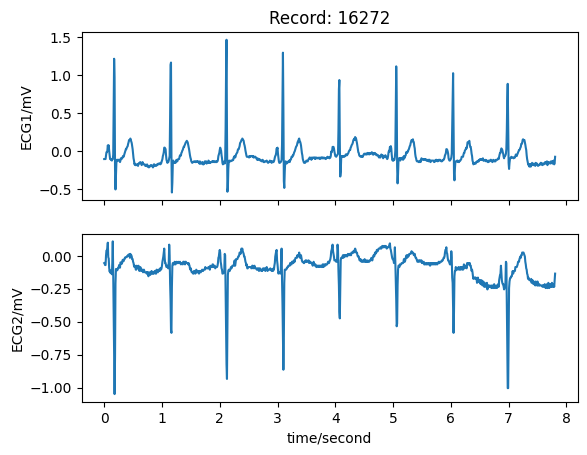

In [27]:
wfdb.plot_wfdb(record)

In [24]:
resampled_signal, resampled_annotations = preprocessing_utils.resample_record_and_annotations(record, annotations, fs_target)
signal, annotations = preprocessing_utils.normalize_signal_and_center(resampled_signal), resampled_annotations

signal = preprocessing_utils.cutoff_freqs_fir_filter(signal)
signal = preprocessing_utils.remove_baseline_wander_wavelets(signal)

In [12]:
wfdb.wrsamp(record_name=test_record_name + "_test", fs=fs_target, units=record.units,
            sig_name=['ECG CH1', 'ECG CH2'], p_signal=signal, fmt=fmt,
            write_dir=test_target_path)

wfdb.wrann(test_record_name + "_test", extension='atr', sample=annotations.sample,
           symbol=annotations.symbol, fs=fs_target,
           write_dir=test_target_path)

NameError: name 'signal' is not defined

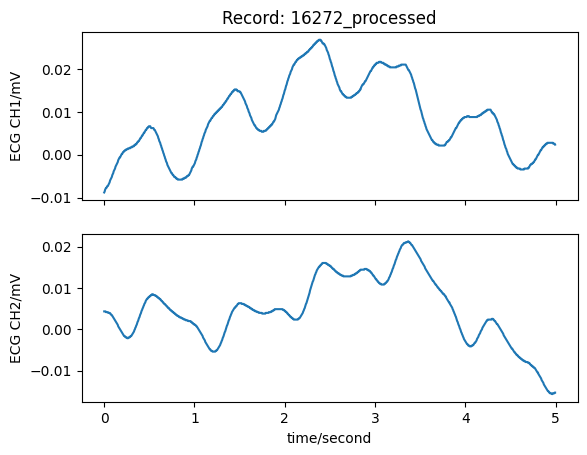

In [28]:
tested_record = wfdb.rdrecord(test_test_path, sampfrom=5000, sampto=6000)
tested_annotations = wfdb.rdann(test_test_path, "atr")
wfdb.plot_wfdb(tested_record)

In [36]:
tested_record.p_signal[:, 0]

array([-0.00880263, -0.00858793, -0.00815853, -0.00794384, -0.00772914,
       -0.00772914, -0.00751444, -0.00729974, -0.00729974, -0.00708504,
       -0.00687034, -0.00665565, -0.00644095, -0.00601155, -0.00579685,
       -0.00558215, -0.00536746, -0.00515276, -0.00472336, -0.00450866,
       -0.00429397, -0.00386457, -0.00364987, -0.00343517, -0.00322047,
       -0.00279108, -0.00257638, -0.00236168, -0.00214698, -0.00193228,
       -0.00171759, -0.00128819, -0.00107349, -0.00085879, -0.00064409,
       -0.00064409, -0.0004294 , -0.0002147 ,  0.        ,  0.0002147 ,
        0.0002147 ,  0.0004294 ,  0.00064409,  0.00064409,  0.00085879,
        0.00085879,  0.00107349,  0.00107349,  0.00107349,  0.00128819,
        0.00128819,  0.00128819,  0.00128819,  0.00150289,  0.00150289,
        0.00150289,  0.00150289,  0.00150289,  0.00171759,  0.00171759,
        0.00171759,  0.00171759,  0.00193228,  0.00193228,  0.00193228,
        0.00193228,  0.00214698,  0.00214698,  0.00236168,  0.00

In [37]:
from matplotlib import pyplot as plt

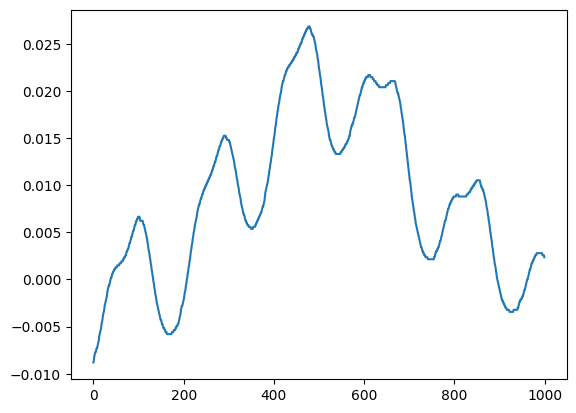

In [38]:
plt.plot(tested_record.p_signal[:, 0])